In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data.info
data.shape
data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


Data cleaning

In [5]:
#round off Total Claim amount
print(data['Total Claim Amount'].isna().sum())
data['Total Claim Amount'] = data['Total Claim Amount'].apply(lambda x : round(x, 2))
data['Total Claim Amount'].head()
# Check out duplicates: df.drop_duplicates()
# Deal with missing values: df.isna().sum()
# df[col] = df[col].fillna(value)

0


0     384.81
1    1131.46
2     566.47
3     529.88
4     138.13
Name: Total Claim Amount, dtype: float64

Show a plot of the total number of responses

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

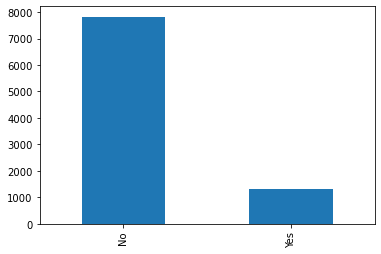

In [6]:
display(data['Response'].unique())
data['Response'].value_counts()
data['Response'].value_counts().plot(kind='bar')
#can be constructed using sns 

Show a plot of the response rate by the sales channel

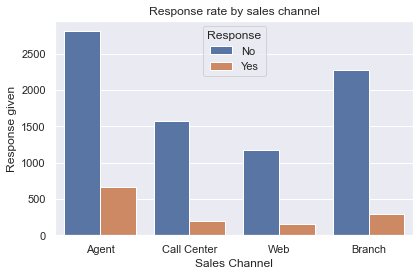

In [7]:
sns.set()
sns.countplot(data=data, x="Sales Channel", hue="Response")
plt.title("Response rate by sales channel")
plt.ylabel("Response given")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()


Show a plot of the response rate by the sales channel

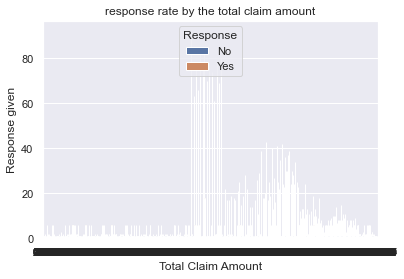

In [25]:
sns.set()
sns.countplot(data=data, x="Total Claim Amount", hue="Response")
plt.title("response rate by the total claim amount")
plt.ylabel("Response given")
plt.xlabel("Total Claim Amount")
plt.show()

Show a plot of the response rate by income

Here I have tried to visualise the data with Box plots. From Tableau we understood that a Dimension like "Response" can be used to split the measurement like "Income"

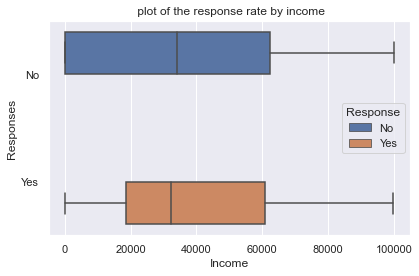

In [9]:
sns.set()
sns.boxplot(x = 'Income',y='Response', hue = "Response", data=data)
plt.title(" plot of the response rate by income")
plt.ylabel("Responses")
plt.xlabel("Income")
plt.tight_layout()
plt.show()


Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [10]:
discrete_values = pd.DataFrame()
continuous_values = pd.DataFrame()
categorical_values = pd.DataFrame()

def check_dataypes(data):
    numerical_discrete = data.select_dtypes(np.number)
    numerical_continuous = data.select_dtypes(include=['float64'])
    categorical = data.select_dtypes(object)
    return numerical_discrete,numerical_continuous,categorical

In [11]:
discrete_values,continuous_values,categorical_values = check_dataypes(data)
discrete_values.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.81
1,6979.535903,0,94,13,42,0,8,1131.46
2,12887.431650,48767,108,18,38,0,2,566.47
3,7645.861827,0,106,18,65,0,7,529.88
4,2813.692575,43836,73,12,44,0,1,138.13


Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

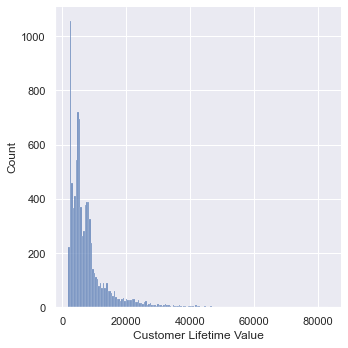

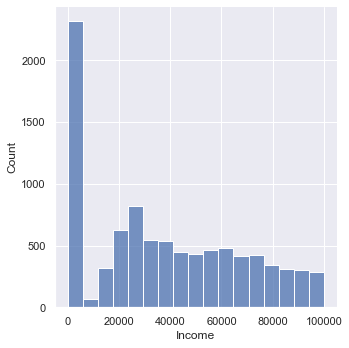

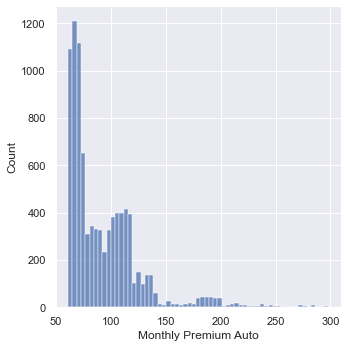

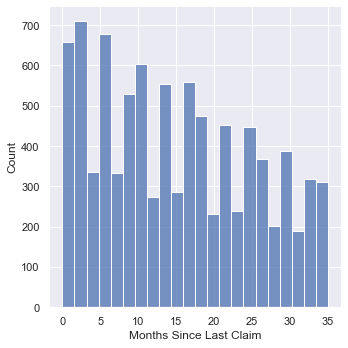

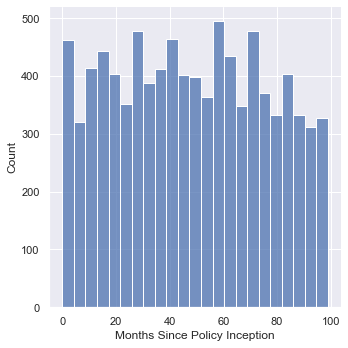

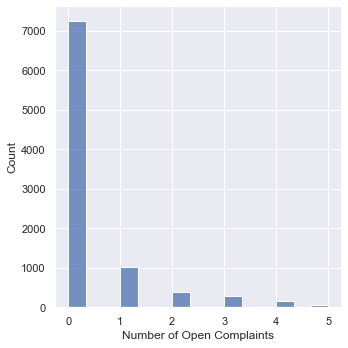

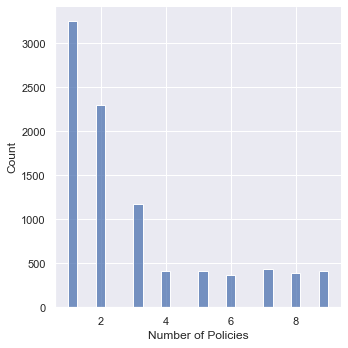

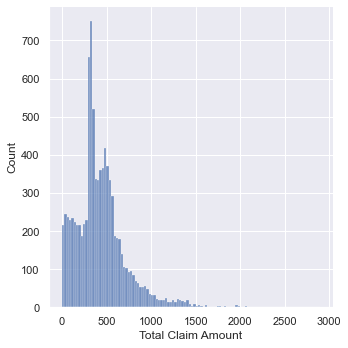

In [20]:
# plotting the discrete values
def plot_numericals(data):
    for col in data.columns:
        sns.set()
        sns.displot(x=data[col])

plot_numericals(discrete_values)


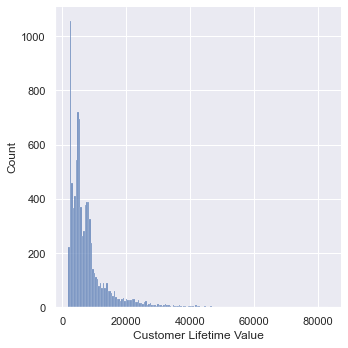

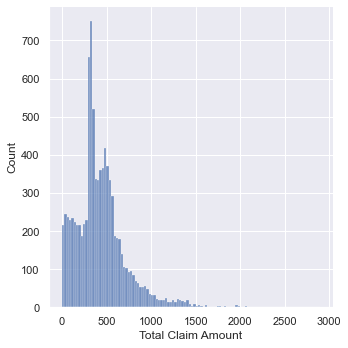

In [21]:
# plotting the continuous values
plot_numericals(continuous_values)

- Use Matplotlib to construct histograms

In [23]:
# plotting the discrete values
def plot_numericals_matplot(data):
    for col in data.columns:
        data[col].hist(bins=60)
        plt.show()

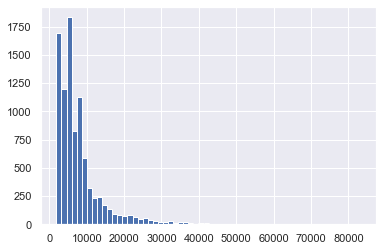

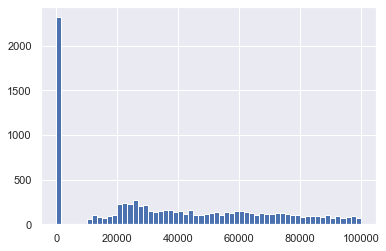

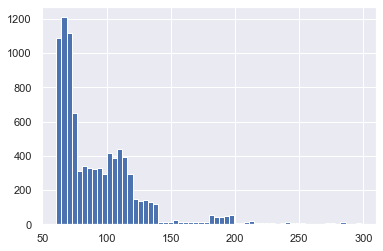

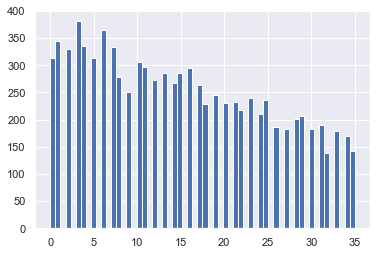

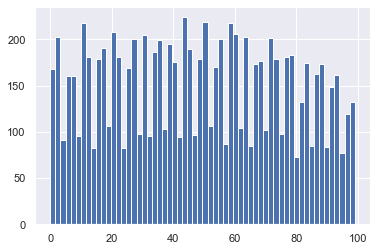

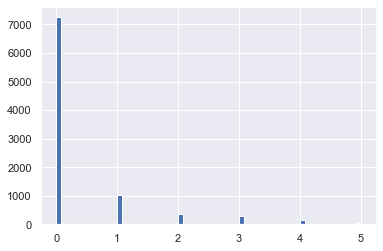

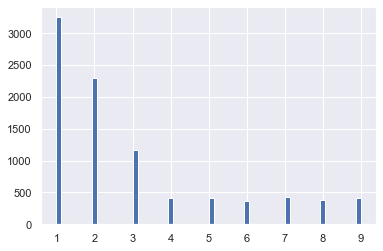

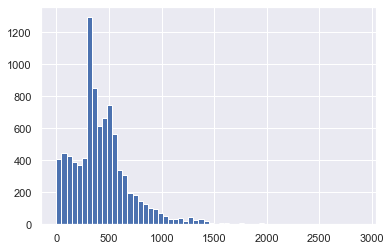

In [24]:
plot_numericals_matplot(discrete_values)

- Do the distributions for different numerical variables look like a normal distribution

--> No.they are not symmetrical like the normal distributions

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [ ]:
# this can be done using a Heat map on the Numerical data set minus the 'total_claim_amount'

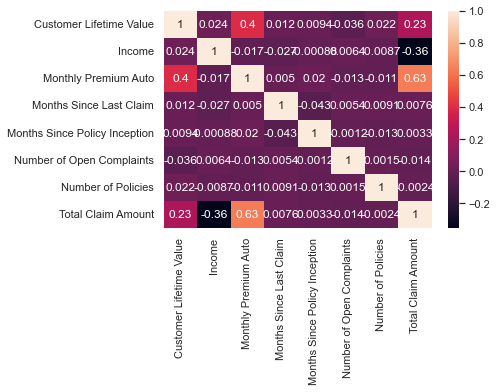

In [27]:
correlations_matrix = discrete_values.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#result it seems that the Customer Lifetime Value and Monthly Premium Auto

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

it seesm there is none of the values that are highy correlated (either 0.9 or -0.9)